# <center> PDL Lab18. Multi Class Text Classification using LSTM and Bidirectional LSTM </center>

### 205229103

### Arzoo Sah

#### Import libraries

In [76]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk 
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding,SimpleRNN,LSTM,Bidirectional,Dropout
from tensorflow.keras.utils import to_categorical
from nltk.corpus import stopwords
nltk.download('stopwords')
",".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Pre-processing the Text

In [2]:
df = pd.read_csv("/content/lstm-lab-dataset.csv")
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
y =df['category']
X=[]
for review in df['text']:
    filtered_sentence = [w.lower() for w in review.split() if not w in STOPWORDS]
    X.append(filtered_sentence)
X = pd.Series(X)  

In [4]:
X

0       [tv, future, hands, viewers, home, theatre, sy...
1       [worldcom, boss, left, books, alone, former, w...
2       [tigers, wary, farrell, gamble, leicester, say...
3       [yeading, face, newcastle, fa, cup, premiershi...
4       [ocean, twelve, raids, box, office, ocean, twe...
                              ...                        
2220    [cars, pull, us, retail, figures, us, retail, ...
2221    [kilroy, unveils, immigration, policy, ex-chat...
2222    [rem, announce, new, glasgow, concert, us, ban...
2223    [political, squabbles, snowball, become, commo...
2224    [souness, delight, euro, progress, boss, graem...
Length: 2225, dtype: object

### Dataset Preparation

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1780,)
(445,)
(1780,)
(445,)


In [8]:
#label_tokenizer_train = Tokenizer()
label_tokenizer = Tokenizer()

#label_tokenizer_train.fit_on_texts(y_train)
label_tokenizer.fit_on_texts(y)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(y_train))
testing_label_seq = np.array(label_tokenizer.texts_to_sequences(y_test))

In [9]:
print(training_label_seq.shape)
print(testing_label_seq.shape)

(1780, 1)
(445, 1)


In [10]:
train_token = Tokenizer(num_words=5000,oov_token='<oov>')
train_token.fit_on_texts(X_train)
word_index = train_token.word_index
train_sequence = train_token.texts_to_sequences(X_train)
dict(list(word_index.items())[0:10])

{'-': 3,
 '<oov>': 1,
 'also': 6,
 'mr': 4,
 'new': 8,
 'one': 10,
 'people': 7,
 'said': 2,
 'us': 9,
 'would': 5}

In [11]:
train_padded = pad_sequences(train_sequence,maxlen=300,padding='post')

In [12]:
train_padded.shape

(1780, 300)

In [13]:
train_padded[5]

array([ 591,  616, 3123,    1,    1,    1, 3705,   10, 3241, 1216,   25,
        278, 2509,    1, 3124,   88, 3125,  651, 3026,  796,  483,  974,
       1526,    1, 4266,    1,    1,    4,    1,  129, 1254, 3530,  116,
          1, 2321,   24,    1,  676,   24,    1, 4267,  197,   19,  667,
       2192, 1173,    1, 3126,    7, 1655,  651,  833, 3531,   10,  290,
          1, 2912, 1773,    1,  610,  174,  222,  667,  155,  833, 1039,
       3027,  178,  136,    1,  690,  722, 1040,  819,  136,  537,    1,
        394,  136, 3127,  868,  667,  136,  690,    1,  178,  136, 3385,
        155,  156,    6,  442,  418, 4058,    1,    1, 1332, 3706,  869,
       4494,  387, 2913, 2510,   46, 3707, 2914,  355,    1, 2596, 3128,
       1656,    1, 2699,  155,  156,  419, 1773, 4059, 1074,    1,    1,
         28,    1,    1,  215,  212, 1174, 3893, 2439,  193,  916,   73,
          1,  278,    1,  197,  948,  537, 1725, 1573,    1,    1, 3241,
       1175, 3241,  704, 1094,    1,    1,   18,  6

In [14]:
test_token = Tokenizer(num_words=5000,oov_token='<oov>')
test_token.fit_on_texts(X_test)
word_index = test_token.word_index
test_sequence = test_token.texts_to_sequences(X_test)
dict(list(word_index.items())[0:10])

{'-': 4,
 '<oov>': 1,
 'also': 6,
 'mr': 3,
 'new': 7,
 'one': 9,
 'people': 8,
 'said': 2,
 'us': 10,
 'would': 5}

In [15]:
test_padded = pad_sequences(test_sequence,maxlen=300,padding='post')

In [16]:
test_padded.shape

(445, 300)

In [17]:
test_padded[5]

array([   7,  870, 2342,  217,    1, 2343, 3484,   40,  373, 1027, 4094,
          1,   71, 1215,    1,  494,    1,  923, 1216,  111, 3485,  106,
          1, 1390,  534,    1, 4095,  121,  333,  373,  755,  924, 1391,
          1, 3486,    1,   40,    1,   23,   66, 1287, 2097,    1, 4096,
        183,  141, 3486, 4097,  515,  155, 4094, 3487,  334,  515,  756,
          1, 1877,  106, 1483,  139, 1217,  439,  334, 1215, 4098,  421,
         66,    1, 2344,   37,    1,   72,    1, 1730, 2998,    1, 1288,
       1282,    1,    6, 2636,    1, 3485,   69,   18, 4099, 2999,  428,
        113,  238,  444,  420, 1289, 2345,  121, 3000,   99, 3488, 1218,
          4, 1730,  239,    1,  162, 1729,    2, 3001,    1, 1730,  783,
         26,   51, 1731,  355, 1892,  463,    1,    4,   99, 3488,   33,
         84,    1,  290,  536,  300, 1484,    1,  121,  689, 1290,   44,
          1, 1291,   37,  217,    1,  177,  783,  175,  783, 1215, 4098,
        925,  872, 1484, 4100,    1,    1,   74, 23

### Model Creation

In [18]:
vocab_size = 5000
embedding_dim = 64
max_length = 300
padding_type = 'post'
oov_tok = '<OOV>'

In [19]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(embedding_dim))
model.add(Dense(embedding_dim, activation='relu'))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 357,574
Trainable params: 357,574
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit(train_padded,training_label_seq,epochs=10,verbose=2,validation_data=(test_padded,testing_label_seq),batch_size=28)

Epoch 1/10
64/64 - 7s - loss: 1.6551 - accuracy: 0.2343 - val_loss: 1.6012 - val_accuracy: 0.2944
Epoch 2/10
64/64 - 4s - loss: 1.5836 - accuracy: 0.2674 - val_loss: 1.6543 - val_accuracy: 0.2202
Epoch 3/10
64/64 - 4s - loss: 1.5875 - accuracy: 0.2528 - val_loss: 1.6130 - val_accuracy: 0.2382
Epoch 4/10
64/64 - 4s - loss: 1.5485 - accuracy: 0.2843 - val_loss: 1.5781 - val_accuracy: 0.2742
Epoch 5/10
64/64 - 4s - loss: 1.4658 - accuracy: 0.3410 - val_loss: 1.5771 - val_accuracy: 0.2787
Epoch 6/10
64/64 - 4s - loss: 1.4186 - accuracy: 0.3567 - val_loss: 1.5814 - val_accuracy: 0.2517
Epoch 7/10
64/64 - 4s - loss: 1.3191 - accuracy: 0.4433 - val_loss: 1.6101 - val_accuracy: 0.1820
Epoch 8/10
64/64 - 4s - loss: 1.4231 - accuracy: 0.3663 - val_loss: 1.5691 - val_accuracy: 0.2539
Epoch 9/10
64/64 - 4s - loss: 1.3537 - accuracy: 0.3815 - val_loss: 1.6422 - val_accuracy: 0.2674
Epoch 10/10
64/64 - 4s - loss: 1.2101 - accuracy: 0.4753 - val_loss: 1.6737 - val_accuracy: 0.2562


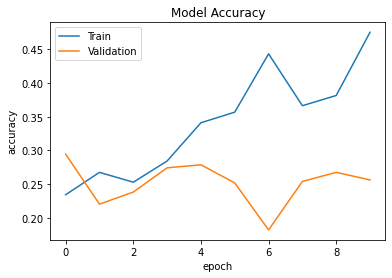

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [23]:
score=model.evaluate(test_padded,testing_label_seq)
print("loss: ",score[0])
print("accuracy: ",score[1])

14/14 [==============================] - 0s 22ms/step - loss: 1.6737 - accuracy: 0.2562
loss:  1.6736929416656494
accuracy:  0.2561797797679901


### Number of Layers: 

In [24]:
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim))
model1.add(LSTM(embedding_dim,return_sequences=True))
model1.add(LSTM(embedding_dim))
model1.add(Dense(embedding_dim, activation='relu'))
model1.add(Dense(6,activation='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 390,598
Trainable params: 390,598
Non-trainable params: 0
_________________________________________________________________


In [25]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
history1 = model1.fit(train_padded,training_label_seq,epochs=10,verbose=2,validation_data=(test_padded,testing_label_seq),batch_size=28)

Epoch 1/10
64/64 - 13s - loss: 1.6449 - accuracy: 0.2388 - val_loss: 1.5871 - val_accuracy: 0.3034
Epoch 2/10
64/64 - 8s - loss: 1.6072 - accuracy: 0.2635 - val_loss: 1.7619 - val_accuracy: 0.2090
Epoch 3/10
64/64 - 8s - loss: 1.4378 - accuracy: 0.3500 - val_loss: 1.8475 - val_accuracy: 0.2270
Epoch 4/10
64/64 - 8s - loss: 1.4337 - accuracy: 0.3444 - val_loss: 1.8396 - val_accuracy: 0.2270
Epoch 5/10
64/64 - 8s - loss: 1.4267 - accuracy: 0.3635 - val_loss: 1.8707 - val_accuracy: 0.2292
Epoch 6/10
64/64 - 8s - loss: 1.4240 - accuracy: 0.3534 - val_loss: 1.8935 - val_accuracy: 0.2225
Epoch 7/10
64/64 - 8s - loss: 1.4188 - accuracy: 0.3652 - val_loss: 1.9346 - val_accuracy: 0.2247
Epoch 8/10
64/64 - 8s - loss: 1.3893 - accuracy: 0.3792 - val_loss: 1.9662 - val_accuracy: 0.2112
Epoch 9/10
64/64 - 8s - loss: 1.3651 - accuracy: 0.3787 - val_loss: 2.0292 - val_accuracy: 0.2022
Epoch 10/10
64/64 - 8s - loss: 1.3991 - accuracy: 0.3590 - val_loss: 1.9433 - val_accuracy: 0.2090


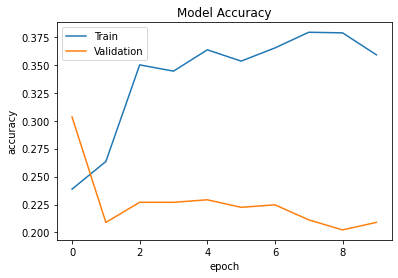

In [27]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [28]:
score=model1.evaluate(test_padded,testing_label_seq)
print("loss: ",score[0])
print("accuracy: ",score[1])

14/14 [==============================] - 1s 45ms/step - loss: 1.9433 - accuracy: 0.2090
loss:  1.9432774782180786
accuracy:  0.20898877084255219


In [29]:
model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_dim))
model2.add(LSTM(embedding_dim,return_sequences=True))
model2.add(LSTM(embedding_dim,return_sequences=True))
model2.add(LSTM(embedding_dim))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(6,activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 774       
Total params: 428,166
Trainable params: 428,166
Non-trainable params: 0
________________________________________________

In [30]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
history2 = model2.fit(train_padded,training_label_seq,epochs=10,verbose=2,validation_data=(test_padded,testing_label_seq),batch_size=28)

Epoch 1/10
64/64 - 19s - loss: 1.6277 - accuracy: 0.2702 - val_loss: 1.5474 - val_accuracy: 0.2989
Epoch 2/10
64/64 - 13s - loss: 1.4747 - accuracy: 0.3135 - val_loss: 2.1314 - val_accuracy: 0.2135
Epoch 3/10
64/64 - 13s - loss: 1.3205 - accuracy: 0.3421 - val_loss: 2.0249 - val_accuracy: 0.1978
Epoch 4/10
64/64 - 13s - loss: 1.3122 - accuracy: 0.3736 - val_loss: 2.0660 - val_accuracy: 0.1888
Epoch 5/10
64/64 - 13s - loss: 1.3081 - accuracy: 0.3528 - val_loss: 2.0823 - val_accuracy: 0.2022
Epoch 6/10
64/64 - 13s - loss: 1.3059 - accuracy: 0.3657 - val_loss: 2.0371 - val_accuracy: 0.1978
Epoch 7/10
64/64 - 13s - loss: 1.3038 - accuracy: 0.3629 - val_loss: 2.0742 - val_accuracy: 0.2180
Epoch 8/10
64/64 - 13s - loss: 1.2958 - accuracy: 0.3854 - val_loss: 1.8042 - val_accuracy: 0.2539
Epoch 9/10
64/64 - 13s - loss: 1.3873 - accuracy: 0.3528 - val_loss: 1.9900 - val_accuracy: 0.1730
Epoch 10/10
64/64 - 13s - loss: 1.4123 - accuracy: 0.3483 - val_loss: 1.8904 - val_accuracy: 0.1708


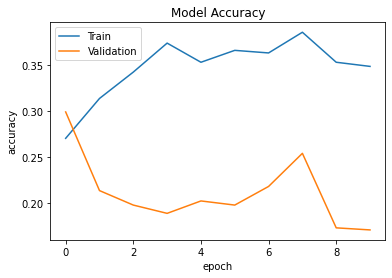

In [32]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [33]:
score=model2.evaluate(test_padded,testing_label_seq)
print("loss: ",score[0])
print("accuracy: ",score[1])

14/14 [==============================] - 1s 78ms/step - loss: 1.8904 - accuracy: 0.1708
loss:  1.8904163837432861
accuracy:  0.170786514878273


In [34]:
model3 = Sequential()
model3.add(Embedding(vocab_size, embedding_dim))
model3.add(LSTM(embedding_dim,return_sequences=True))
model3.add(LSTM(embedding_dim,return_sequences=True))
model3.add(LSTM(embedding_dim,return_sequences=True))
model3.add(LSTM(embedding_dim))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(6,activation='softmax'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
lstm_7 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
lstm_8 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 6)                

In [35]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [36]:
history3 = model3.fit(train_padded,training_label_seq,epochs=10,verbose=2,validation_data=(test_padded,testing_label_seq),batch_size=28)

Epoch 1/10
64/64 - 26s - loss: 1.6678 - accuracy: 0.2219 - val_loss: 1.6192 - val_accuracy: 0.2539
Epoch 2/10
64/64 - 18s - loss: 1.5314 - accuracy: 0.3096 - val_loss: 1.6542 - val_accuracy: 0.1910
Epoch 3/10
64/64 - 18s - loss: 1.4614 - accuracy: 0.3410 - val_loss: 1.6463 - val_accuracy: 0.2449
Epoch 4/10
64/64 - 18s - loss: 1.3117 - accuracy: 0.3876 - val_loss: 2.0519 - val_accuracy: 0.1910
Epoch 5/10
64/64 - 18s - loss: 1.3396 - accuracy: 0.3753 - val_loss: 1.5568 - val_accuracy: 0.3101
Epoch 6/10
64/64 - 18s - loss: 1.0662 - accuracy: 0.5337 - val_loss: 1.8750 - val_accuracy: 0.2876
Epoch 7/10
64/64 - 18s - loss: 1.0146 - accuracy: 0.5399 - val_loss: 2.2426 - val_accuracy: 0.2067
Epoch 8/10
64/64 - 18s - loss: 1.0242 - accuracy: 0.4815 - val_loss: 2.3583 - val_accuracy: 0.2022
Epoch 9/10
64/64 - 18s - loss: 1.1406 - accuracy: 0.4680 - val_loss: 1.9617 - val_accuracy: 0.2382
Epoch 10/10
64/64 - 18s - loss: 1.1660 - accuracy: 0.4506 - val_loss: 2.0175 - val_accuracy: 0.2382


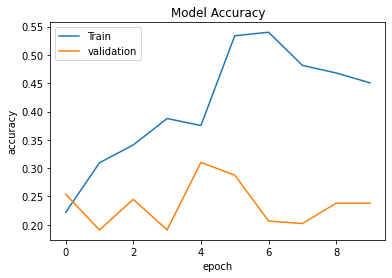

In [37]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'])
plt.show()

In [38]:
score=model3.evaluate(test_padded,testing_label_seq)
print("loss: ",score[0])
print("accuracy: ",score[1])

14/14 [==============================] - 2s 110ms/step - loss: 2.0175 - accuracy: 0.2382
loss:  2.0175046920776367
accuracy:  0.23820224404335022


### Variations

In [39]:
model4 = Sequential()
model4.add(Embedding(vocab_size, embedding_dim))
model4.add(Bidirectional(LSTM(embedding_dim)))
model4.add(Dense(embedding_dim, activation='relu'))
model4.add(Dense(6,activation='softmax'))
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [40]:
model4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [41]:
history4 = model4.fit(train_padded,training_label_seq,epochs=10,verbose=2,validation_data=(test_padded,testing_label_seq),batch_size=28)

Epoch 1/10
64/64 - 12s - loss: 1.6258 - accuracy: 0.2573 - val_loss: 1.5578 - val_accuracy: 0.3146
Epoch 2/10
64/64 - 8s - loss: 1.1234 - accuracy: 0.5466 - val_loss: 1.7607 - val_accuracy: 0.2629
Epoch 3/10
64/64 - 8s - loss: 0.6194 - accuracy: 0.6747 - val_loss: 2.1243 - val_accuracy: 0.2719
Epoch 4/10
64/64 - 8s - loss: 0.4383 - accuracy: 0.8118 - val_loss: 2.1489 - val_accuracy: 0.2674
Epoch 5/10
64/64 - 8s - loss: 0.1786 - accuracy: 0.9584 - val_loss: 3.4973 - val_accuracy: 0.2360
Epoch 6/10
64/64 - 8s - loss: 0.0763 - accuracy: 0.9860 - val_loss: 2.9787 - val_accuracy: 0.2809
Epoch 7/10
64/64 - 8s - loss: 0.0263 - accuracy: 0.9938 - val_loss: 3.4184 - val_accuracy: 0.2562
Epoch 8/10
64/64 - 8s - loss: 0.0048 - accuracy: 1.0000 - val_loss: 4.2492 - val_accuracy: 0.2697
Epoch 9/10
64/64 - 8s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 4.4583 - val_accuracy: 0.2674
Epoch 10/10
64/64 - 8s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 4.6567 - val_accuracy: 0.2787


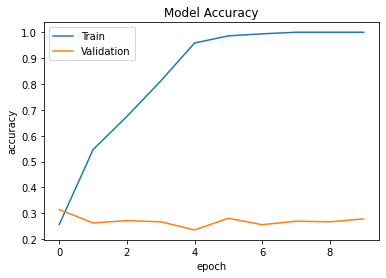

In [42]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'])
plt.show()

In [43]:
score=model4.evaluate(test_padded,testing_label_seq)
print("loss: ",score[0])
print("accuracy: ",score[1])

14/14 [==============================] - 1s 42ms/step - loss: 4.6567 - accuracy: 0.2787
loss:  4.656728744506836
accuracy:  0.2786516845226288


In [77]:
model5 = Sequential()
model5.add(Embedding(vocab_size, embedding_dim))
model5.add(Bidirectional(LSTM(embedding_dim)))
model5.add(Dense(embedding_dim, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(6,activation='softmax'))
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [78]:
model5.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [79]:
history5 = model5.fit(train_padded,training_label_seq,epochs=10,verbose=2,validation_data=(test_padded,testing_label_seq),batch_size=28)

Epoch 1/10
64/64 - 13s - loss: 1.6584 - accuracy: 0.2562 - val_loss: 1.6065 - val_accuracy: 0.2809
Epoch 2/10
64/64 - 8s - loss: 1.1781 - accuracy: 0.5421 - val_loss: 1.7678 - val_accuracy: 0.2854
Epoch 3/10
64/64 - 8s - loss: 0.5547 - accuracy: 0.7815 - val_loss: 1.9893 - val_accuracy: 0.2944
Epoch 4/10
64/64 - 8s - loss: 0.2283 - accuracy: 0.9444 - val_loss: 3.2284 - val_accuracy: 0.2629
Epoch 5/10
64/64 - 8s - loss: 0.0629 - accuracy: 0.9848 - val_loss: 2.9758 - val_accuracy: 0.2742
Epoch 6/10
64/64 - 8s - loss: 0.0292 - accuracy: 0.9944 - val_loss: 3.7504 - val_accuracy: 0.2764
Epoch 7/10
64/64 - 8s - loss: 0.0125 - accuracy: 0.9983 - val_loss: 3.7244 - val_accuracy: 0.2809
Epoch 8/10
64/64 - 8s - loss: 0.0080 - accuracy: 0.9994 - val_loss: 4.2627 - val_accuracy: 0.2899
Epoch 9/10
64/64 - 8s - loss: 0.0058 - accuracy: 0.9994 - val_loss: 4.6649 - val_accuracy: 0.2876
Epoch 10/10
64/64 - 8s - loss: 0.0061 - accuracy: 0.9989 - val_loss: 4.6685 - val_accuracy: 0.3034


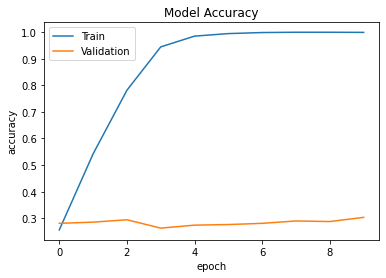

In [80]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'])
plt.show()

In [81]:
score=model5.evaluate(test_padded,testing_label_seq)
print("loss: ",score[0])
print("accuracy: ",score[1])

14/14 [==============================] - 1s 43ms/step - loss: 4.6685 - accuracy: 0.3034
loss:  4.66847038269043
accuracy:  0.30337077379226685


### prediction on sample data

In [83]:
txt = ["TCS, Wipro, HCL Technologies and Infosys have ramped up their hiring projections and have added over 50,000 people in the second quarter of FY22, taking the hiring number to more than one lakh (1,02,517) in the first six months of the fiscal year. These four firms employ more than one fourth of India’s total workforce"]
tokenizer = Tokenizer(num_words=5000,oov_token='<oov>')
tokenizer.fit_on_texts(txt)
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=300)
pred = model4.predict(padded)
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
print(pred) 
print(labels[np.argmax(pred)])

[[1.7141012e-06 9.9800712e-01 1.5627014e-06 1.6456535e-06 4.2972280e-04
  1.5583149e-03]]
bussiness
